In [1]:
#要先装包 pip install keras-vis

from keras.models import load_model, Model
from keras import activations
from vis.utils import utils
from vis.visualization import visualize_saliency,overlay
import cv2
import numpy as np
import pickle
import matplotlib.cm as cm
from matplotlib import pyplot as plt

C:\Users\fantao\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model(r'best.h5')

In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
for i, j in enumerate(model.layers):
    print(i, j)

0 <keras.engine.input_layer.InputLayer object at 0x000001D72E537780>
1 <keras.layers.convolutional.Conv2D object at 0x000001D72E2375C0>
2 <keras.layers.convolutional.Conv2D object at 0x000001D72E537AC8>
3 <keras.layers.pooling.MaxPooling2D object at 0x000001D72E537E10>
4 <keras.layers.convolutional.Conv2D object at 0x000001D72E537EB8>
5 <keras.layers.convolutional.Conv2D object at 0x000001D72E571080>
6 <keras.layers.pooling.MaxPooling2D object at 0x000001D72E571208>
7 <keras.layers.convolutional.Conv2D object at 0x000001D72E5712B0>
8 <keras.layers.convolutional.Conv2D object at 0x000001D72E571438>
9 <keras.layers.convolutional.Conv2D object at 0x000001D72E5715C0>
10 <keras.layers.pooling.MaxPooling2D object at 0x000001D72E571748>
11 <keras.layers.convolutional.Conv2D object at 0x000001D72E5717F0>
12 <keras.layers.convolutional.Conv2D object at 0x000001D72E571978>
13 <keras.layers.convolutional.Conv2D object at 0x000001D72E571B00>
14 <keras.layers.pooling.MaxPooling2D object at 0x000001

In [3]:
def read_img(p):
    print('-----读取图片-----')
    img_arrs = cv2.imread(p)
    img_arrs = cv2.resize(img_arrs, (224, 224))
    img_arrays = np.array(img_arrs).astype(np.float32)/ 255.0
    return img_arrays

In [4]:
img = read_img(r'test1.jpg')

-----读取图片-----


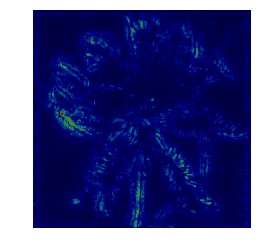

In [69]:
model.layers[2].activation = activations.linear
model = utils.apply_modifications(model)
grads= visualize_saliency(model, 22, filter_indices=2, seed_input=img, backprop_modifier='guided')
jet_heatmap = np.uint8(cm.jet(grads)[..., :3]*255)
plt.imshow(overlay(jet_heatmap, img))
plt.axis('off')
plt.savefig(r'14.png')
plt.show()